# HW4
## Question 1 Exploratory Data Analysis


### From example/input/ load compustat.csv inside compustat.zip without unzip compustat.zip

In [2]:
import pandas as pd
from zipfile import ZipFile

In [85]:
myzip=ZipFile('compustat.zip')
f=myzip.open('compustat.csv')
df=pd.read_csv(f)

### Compute the following:

In [6]:
#Time series mean
df['saleq'].mean()

445.1506638794169

In [7]:
#Time Series standard deviation
df['saleq'].std()

2679.706576405277

In [8]:
#Time Series count of missing values
df['saleq'].isnull().sum()

269498

In [9]:
#Time Series ratio of missing values
df['saleq'].isnull().sum()/len(df)

0.14878714116222666

In [22]:
#Aggregate the result in a dataframe
result = pd.DataFrame()
result['mean'] = [df['saleq'].mean()]
result['std'] = [df['saleq'].std()]
result['count_miss'] = df['saleq'].isnull().sum()
result['ratio_miss'] = df['saleq'].isnull().sum()/len(df)
print(result)

         mean          std  count_miss  ratio_miss
0  445.150664  2679.706576      269498    0.148787


### Answer the following questions:

Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?

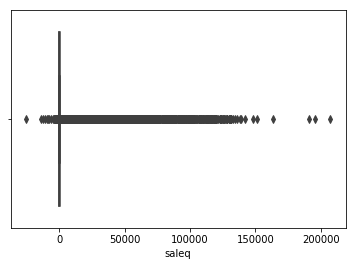

In [45]:
#Box-Plot
import seaborn as sns
sns.boxplot(x=df['saleq'])

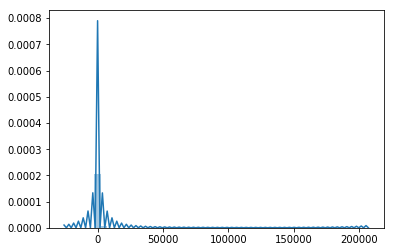

In [47]:
#Distriubtion-Plot
sns.distplot(df['saleq'].dropna().values)

In [27]:
#use IQR score to deal with outliers
#25% quantile
Q1 = df['saleq'].quantile(0.25)
#75% quantile
Q3 = df['saleq'].quantile(0.75)
#IQR
IQR = Q3 - Q1
#create a new saleq column that got rid of outliers
df['saleq_new'] = df['saleq'][(df['saleq'] > (Q1 - 1.5 * IQR)) & (df['saleq'] < (Q3 + 1.5 * IQR))]
#compute the mean\std\missing value of the new column
result_new = pd.DataFrame()
result_new['mean'] = [df['saleq_new'].mean()]
result_new['std'] = [df['saleq_new'].std()]
result_new['count_miss'] = df['saleq_new'].isnull().sum()
result_new['ratio_miss'] = df['saleq_new'].isnull().sum()/len(df)
print(result_new)

        mean        std  count_miss  ratio_miss
0  44.668567  68.204818      504108    0.278313


## Question 2 Compute Industry Concentration

The defination of HHI index could be found:
https://www.investopedia.com/terms/h/hhi.asp#:~:text=The%20Herfindahl%2DHirschman%20Index%20(HHI)%20is%20a%20commonly%20accepted,close%20to%20zero%20to%2010%2C000.
This index is used to measure the industry concentration and was used by congressman to determine whether to approve a merge deal or not.
Using the same data in question 1. Compute a panel data for HHI index for all industry, using a 2 digit SIC code.
Choose top 4 industry with the highest average HHI index, plot their time series pattern of HHI in a 2 by 2 figure.

In [83]:
#use pivot table to compute the saleq_sum(quarterly sum of sales in a certain industry) of a industry in a quarter
saleq_sum = pd.pivot_table(df, index=['sic','datacqtr'],values=['saleq'],aggfunc=np.sum)
#set the index to ['sic','datacqtr']
df_new = df.set_index(['sic','datacqtr'])
df_new['saleq_sum'] = saleq_sum

In [84]:
#compute the percentage of share of a company in a quarter
df_new['share'] = df_new['saleq']*100/df_new['saleq_sum']
#compute the square of share
df_new['share_square'] = df_new['share']**2

In [82]:
#compute the HHI of each industry in each quarter
HHI = pd.pivot_table(df_new,index=['sic','datacqtr'],values=['share_square'],aggfunc=np.sum)
print(HHI)

                 share_square
sic    datacqtr              
100.0  1962Q1        0.000000
       1962Q2        0.000000
       1962Q3        0.000000
       1962Q4    10000.000000
       1963Q1        0.000000
       1963Q2        0.000000
       1963Q3        0.000000
       1963Q4    10000.000000
       1964Q1        0.000000
       1964Q2    10000.000000
       1964Q3    10000.000000
       1964Q4    10000.000000
       1965Q1        0.000000
       1965Q2    10000.000000
       1965Q3    10000.000000
       1965Q4    10000.000000
       1966Q1    10000.000000
       1966Q2    10000.000000
       1966Q3     3911.862372
       1966Q4     4998.666258
       1967Q1     5070.460686
       1967Q2     5370.794802
       1967Q3     3904.164335
       1967Q4     4897.066698
       1968Q1     3760.782785
       1968Q2     4179.716916
       1968Q3     3296.352767
       1968Q4     4825.081344
       1969Q1     4739.726199
       1969Q2     5412.210099
...                       ...
9998.0 200